# Introduction
> Dataset contains text from works of fiction written by spooky authors of the public domain: Edgar Allan Poe, HP Lovecraft and Mary Shelley. The data was prepared by chunking larger texts into sentences using CoreNLP's MaxEnt sentence tokenizer, so you may notice the odd non-sentence here and there and the features in dataset is id of sentences , authors that're Edgar Allan Poe (EAP), HP Lovecraft (HPL)and Mary Shelley (MWS) and texts itself for each author.
 

> 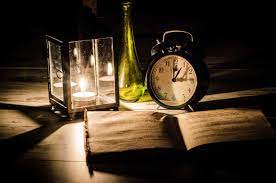


> For Information about Dataset :
https://www.kaggle.com/c/spooky-author-identification


# Importing Libraries and Dataset

In [ ]:
!pip3 install pandas_profiling --upgrade    

In [ ]:
# Installing Stopwords Module in NLTK
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud
import string
%matplotlib inline
sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)

In [ ]:
train  = pd.read_csv('/content/train.csv') 

In [ ]:
train

id                                               text author
0      id26305  This process, however, afforded me no means of...    EAP
1      id17569  It never once occurred to me that the fumbling...    HPL
2      id11008  In his left hand was a gold snuff box, from wh...    EAP
3      id27763  How lovely is spring As we looked from Windsor...    MWS
4      id12958  Finding nothing else, not even gold, the Super...    HPL
...        ...                                                ...    ...
19574  id17718  I could have fancied, while I looked at it, th...    EAP
19575  id08973  The lids clenched themselves together as if in...    EAP
19576  id05267  Mais il faut agir that is to say, a Frenchman ...    EAP
19577  id17513  For an item of news like this, it strikes us i...    EAP
19578  id00393  He laid a gnarled claw on my shoulder, and it ...    HPL

[19579 rows x 3 columns]

In [ ]:
train.head()

id                                               text author
0  id26305  This process, however, afforded me no means of...    EAP
1  id17569  It never once occurred to me that the fumbling...    HPL
2  id11008  In his left hand was a gold snuff box, from wh...    EAP
3  id27763  How lovely is spring As we looked from Windsor...    MWS
4  id12958  Finding nothing else, not even gold, the Super...    HPL

In [ ]:
train.tail()

id                                               text author
19574  id17718  I could have fancied, while I looked at it, th...    EAP
19575  id08973  The lids clenched themselves together as if in...    EAP
19576  id05267  Mais il faut agir that is to say, a Frenchman ...    EAP
19577  id17513  For an item of news like this, it strikes us i...    EAP
19578  id00393  He laid a gnarled claw on my shoulder, and it ...    HPL

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19579 entries, 0 to 19578
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      19579 non-null  object
 1   text    19579 non-null  object
 2   author  19579 non-null  object
dtypes: object(3)
memory usage: 459.0+ KB


In [ ]:
train.describe()

id                                               text author
count     19579                                              19579  19579
unique    19579                                              19579      3
top     id26305  This process, however, afforded me no means of...    EAP
freq          1                                                  1   7900

In [ ]:
#Checking missing values
train.isnull().sum()

id        0
text      0
author    0
dtype: int64

In [ ]:
# For Making all sentences in lowercase
def to_lower (all_sentences) :
    return all_sentences.lower()

In [ ]:
train['text'] = train['text'].apply(to_lower)

In [ ]:
train.drop('id',axis=1,inplace = True)
train

text author
0      this process, however, afforded me no means of...    EAP
1      it never once occurred to me that the fumbling...    HPL
2      in his left hand was a gold snuff box, from wh...    EAP
3      how lovely is spring as we looked from windsor...    MWS
4      finding nothing else, not even gold, the super...    HPL
...                                                  ...    ...
19574  i could have fancied, while i looked at it, th...    EAP
19575  the lids clenched themselves together as if in...    EAP
19576  mais il faut agir that is to say, a frenchman ...    EAP
19577  for an item of news like this, it strikes us i...    EAP
19578  he laid a gnarled claw on my shoulder, and it ...    HPL

[19579 rows x 2 columns]

In [ ]:
test =  pd.read_csv('/content/test.csv')
test

id                                               text
0     id02310  Still, as I urged our leaving Ireland with suc...
1     id24541  If a fire wanted fanning, it could readily be ...
2     id00134  And when they had broken down the frail door t...
3     id27757  While I was thinking how I should possibly man...
4     id04081  I am not sure to what limit his knowledge may ...
...       ...                                                ...
8387  id11749         All this is now the fitter for my purpose.
8388  id10526                 I fixed myself on a wide solitude.
8389  id13477  It is easily understood that what might improv...
8390  id13761  Be this as it may, I now began to feel the ins...
8391  id04282  Long winded, statistical, and drearily genealo...

[8392 rows x 2 columns]

In [ ]:
test.head()

id                                               text
0  id02310  Still, as I urged our leaving Ireland with suc...
1  id24541  If a fire wanted fanning, it could readily be ...
2  id00134  And when they had broken down the frail door t...
3  id27757  While I was thinking how I should possibly man...
4  id04081  I am not sure to what limit his knowledge may ...

In [ ]:
test.tail()

id                                               text
8387  id11749         All this is now the fitter for my purpose.
8388  id10526                 I fixed myself on a wide solitude.
8389  id13477  It is easily understood that what might improv...
8390  id13761  Be this as it may, I now began to feel the ins...
8391  id04282  Long winded, statistical, and drearily genealo...

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8392 entries, 0 to 8391
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      8392 non-null   object
 1   text    8392 non-null   object
dtypes: object(2)
memory usage: 131.2+ KB


In [ ]:
test.describe()

id                                               text
count      8392                                               8392
unique     8392                                               8392
top     id02310  Still, as I urged our leaving Ireland with suc...
freq          1                                                  1

In [ ]:
#Checking missing values
test.isnull().sum()

id      0
text    0
dtype: int64

In [ ]:
# For Making all sentences in lowercase
def to_lower (all_sentences) :
    return all_sentences.lower()

In [ ]:
test['text'] = test['text'].apply(to_lower)

In [ ]:
test.drop('id',axis=1,inplace = True)
test

text
0     still, as i urged our leaving ireland with suc...
1     if a fire wanted fanning, it could readily be ...
2     and when they had broken down the frail door t...
3     while i was thinking how i should possibly man...
4     i am not sure to what limit his knowledge may ...
...                                                 ...
8387         all this is now the fitter for my purpose.
8388                 i fixed myself on a wide solitude.
8389  it is easily understood that what might improv...
8390  be this as it may, i now began to feel the ins...
8391  long winded, statistical, and drearily genealo...

[8392 rows x 1 columns]

# Brief EDA and Visualiaztion

## Count of Labels

In [ ]:
train['author'].value_counts()

EAP    7900
MWS    6044
HPL    5635
Name: author, dtype: int64

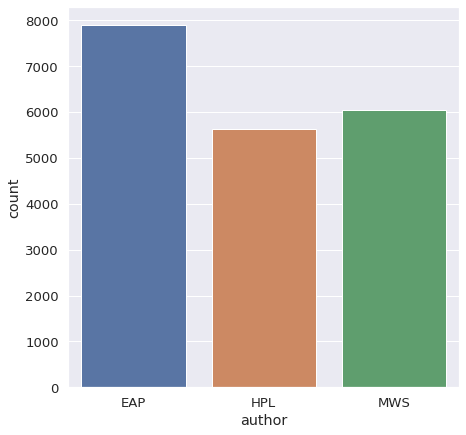

In [ ]:
sns.countplot(x= train['author'])

## Remove Stopwords and Punctuation 
> For Checking Commen Words for each Author and Easing our Vectorizing Process using TF-IDF Vectorizer

In [ ]:
def text_process(text):

    #Checking characters to see if they are in punctuation
    char_list = [char for char in text if char not in string.punctuation]

    #Returning text to its orginal form.
    all_text = ''.join(char_list)
    
    #Removing any stopwords
    list_word = [word for word in all_text.split() if word.lower() not in stopwords.words('english')]
    return ' '.join(list_word)

In [ ]:
#Removing Stopwords and Punctuation in all texts
train['text'] = train['text'].apply(text_process)
train

text author
0      process however afforded means ascertaining di...    EAP
1             never occurred fumbling might mere mistake    HPL
2      left hand gold snuff box capered hill cutting ...    EAP
3      lovely spring looked windsor terrace sixteen f...    MWS
4      finding nothing else even gold superintendent ...    HPL
...                                                  ...    ...
19574  could fancied looked eminent landscape painter...    EAP
19575                       lids clenched together spasm    EAP
19576  mais il faut agir say frenchman never faints o...    EAP
19577          item news like strikes us coolly received    EAP
19578  laid gnarled claw shoulder seemed shaking alto...    HPL

[19579 rows x 2 columns]

In [ ]:
test['text'] = test['text'].apply(text_process)
test

text
0     still urged leaving ireland inquietude impatie...
1     fire wanted fanning could readily fanned newsp...
2     broken frail door found two cleanly picked hum...
3     thinking possibly manage without one actually ...
4                       sure limit knowledge may extend
...                                                 ...
8387                                     fitter purpose
8388                                fixed wide solitude
8389  easily understood might improve closely scruti...
8390  may began feel inspiration burning hope length...
8391  long winded statistical drearily genealogical ...

[8392 rows x 1 columns]

## Authors Commen Words  

### **1. Edgar Allan Poe**

In [ ]:
#Selecting Edgar Allan Poe sentence from dataframe
sentences_EAP = train['text'][train['author']=='EAP']
sentences_EAP

0        process however afforded means ascertaining di...
2        left hand gold snuff box capered hill cutting ...
6        astronomer perhaps point took refuge suggestio...
7                              surcingle hung ribands body
8        knew could say stereotomy without brought thin...
                               ...                        
19572    difficulties attending respiration means great...
19574    could fancied looked eminent landscape painter...
19575                         lids clenched together spasm
19576    mais il faut agir say frenchman never faints o...
19577            item news like strikes us coolly received
Name: text, Length: 7900, dtype: object

In [ ]:
# Adding all Edgar Allan Poe Texts in one Text
sentences_EAP= " ".join( str(sentence) for sentence in sentences_EAP)
sentences_EAP

'process however afforded means ascertaining dimensions dungeon might make circuit return point whence set without aware fact perfectly uniform seemed wall left hand gold snuff box capered hill cutting manner fantastic steps took snuff incessantly air greatest possible self satisfaction astronomer perhaps point took refuge suggestion non luminosity analogy suddenly let fall surcingle hung ribands body knew could say stereotomy without brought think atomies thus theories epicurus since discussed subject long ago mentioned singularly yet little notice vague guesses noble greek met confirmation late nebular cosmogony felt could avoid casting eyes upward great nebula orion certainly expected would barricaded present secure glance show fallacy idea speeches gave course interpretation fancying doubt events come possession vast quantities ready money provided paid owed trifle consideration services dare say cared little became either soul carcass even went far speak slightly hectic cough one 

In [ ]:
list_words_EAP = sentences_EAP.split(' ')

In [ ]:
list_words_EAP

['process',
 'however',
 'afforded',
 'means',
 'ascertaining',
 'dimensions',
 'dungeon',
 'might',
 'make',
 'circuit',
 'return',
 'point',
 'whence',
 'set',
 'without',
 'aware',
 'fact',
 'perfectly',
 'uniform',
 'seemed',
 'wall',
 'left',
 'hand',
 'gold',
 'snuff',
 'box',
 'capered',
 'hill',
 'cutting',
 'manner',
 'fantastic',
 'steps',
 'took',
 'snuff',
 'incessantly',
 'air',
 'greatest',
 'possible',
 'self',
 'satisfaction',
 'astronomer',
 'perhaps',
 'point',
 'took',
 'refuge',
 'suggestion',
 'non',
 'luminosity',
 'analogy',
 'suddenly',
 'let',
 'fall',
 'surcingle',
 'hung',
 'ribands',
 'body',
 'knew',
 'could',
 'say',
 'stereotomy',
 'without',
 'brought',
 'think',
 'atomies',
 'thus',
 'theories',
 'epicurus',
 'since',
 'discussed',
 'subject',
 'long',
 'ago',
 'mentioned',
 'singularly',
 'yet',
 'little',
 'notice',
 'vague',
 'guesses',
 'noble',
 'greek',
 'met',
 'confirmation',
 'late',
 'nebular',
 'cosmogony',
 'felt',
 'could',
 'avoid',
 'cast

In [ ]:
dict_words_EAP_count = {}
for word in list_words_EAP : 
   if word not in dict_words_EAP_count:
        dict_words_EAP_count[word] = 1
   else:
        dict_words_EAP_count[word] += 1

In [ ]:
# Dictionary for each words and its count
dict_words_EAP_count

{'process': 8,
 'however': 254,
 'afforded': 20,
 'means': 111,
 'ascertaining': 4,
 'dimensions': 10,
 'dungeon': 6,
 'might': 188,
 'make': 126,
 'circuit': 9,
 'return': 41,
 'point': 134,
 'whence': 9,
 'set': 51,
 'without': 182,
 'aware': 45,
 'fact': 119,
 'perfectly': 22,
 'uniform': 2,
 'seemed': 150,
 'wall': 52,
 'left': 140,
 'hand': 133,
 'gold': 35,
 'snuff': 9,
 'box': 62,
 'capered': 1,
 'hill': 6,
 'cutting': 8,
 'manner': 114,
 'fantastic': 11,
 'steps': 28,
 'took': 107,
 'incessantly': 2,
 'air': 103,
 'greatest': 23,
 'possible': 80,
 'self': 37,
 'satisfaction': 16,
 'astronomer': 2,
 'perhaps': 95,
 'refuge': 2,
 'suggestion': 15,
 'non': 15,
 'luminosity': 1,
 'analogy': 9,
 'suddenly': 56,
 'let': 144,
 'fall': 25,
 'surcingle': 4,
 'hung': 40,
 'ribands': 1,
 'body': 126,
 'knew': 68,
 'could': 453,
 'say': 267,
 'stereotomy': 3,
 'brought': 57,
 'think': 73,
 'atomies': 1,
 'thus': 254,
 'theories': 6,
 'epicurus': 2,
 'since': 69,
 'discussed': 2,
 'subject'

In [ ]:
# Dictionary for each words and its count Descending 
dict(sorted(dict_words_EAP_count.items(),reverse=True, key=lambda item: item[1]))

{'upon': 1025,
 'one': 652,
 'could': 453,
 'would': 409,
 'said': 356,
 'little': 275,
 'say': 267,
 'well': 267,
 'made': 263,
 'even': 261,
 'time': 260,
 'however': 254,
 'thus': 254,
 'first': 249,
 'man': 242,
 'us': 235,
 'yet': 232,
 'much': 230,
 'found': 230,
 'great': 227,
 'two': 213,
 'long': 212,
 'every': 206,
 'never': 202,
 'still': 196,
 'must': 196,
 'might': 188,
 'without': 182,
 'may': 181,
 'length': 178,
 'whole': 176,
 'within': 175,
 'day': 174,
 'like': 173,
 'although': 171,
 'thought': 169,
 'eyes': 168,
 'mr': 167,
 'indeed': 167,
 'head': 164,
 'far': 162,
 'many': 161,
 'nothing': 153,
 'seemed': 150,
 'three': 150,
 'way': 149,
 'let': 144,
 'night': 143,
 'good': 141,
 'left': 140,
 'matter': 139,
 'old': 139,
 'thing': 135,
 'point': 134,
 'hand': 133,
 'de': 133,
 'see': 131,
 'mind': 131,
 'shall': 130,
 'came': 128,
 'make': 126,
 'body': 126,
 'course': 126,
 'back': 120,
 'seen': 120,
 'fact': 119,
 'feet': 118,
 'saw': 117,
 'room': 116,
 'idea'

In [ ]:
# most 25 common words 
dict_items = dict(sorted(dict_words_EAP_count.items(),reverse=True, key=lambda item: item[1])).items()
first_25 = list(dict_items)[:25]
print(first_25)

[('upon', 1025), ('one', 652), ('could', 453), ('would', 409), ('said', 356), ('little', 275), ('say', 267), ('well', 267), ('made', 263), ('even', 261), ('time', 260), ('however', 254), ('thus', 254), ('first', 249), ('man', 242), ('us', 235), ('yet', 232), ('much', 230), ('found', 230), ('great', 227), ('two', 213), ('long', 212), ('every', 206), ('never', 202), ('still', 196)]


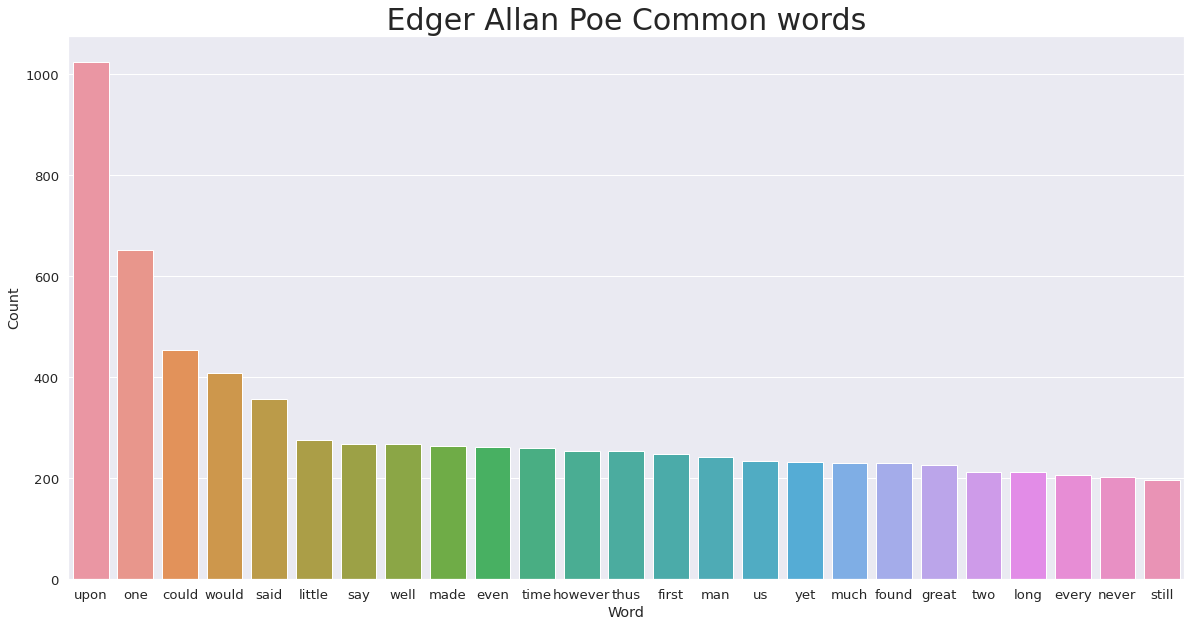

In [ ]:
# Visualize most 25 common words 
sns.set(rc={'figure.figsize': [20 , 10]}, font_scale=1.2)
plt.title(" Edger Allan Poe Common words ", size=30 )
df = pd.DataFrame(first_25, columns = ['Word', 'Count'])
sns.barplot(x = 'Word', y = 'Count', data = df)
plt.show()

In [ ]:
word_cloud = WordCloud(collocations = False, background_color = 'white',
                       height = 3000,width=3000).generate(sentences_EAP)

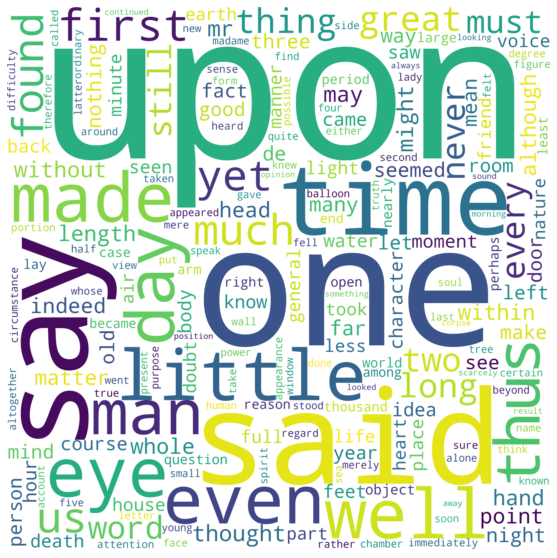

In [ ]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### **2. HP Lovecraft**

In [ ]:
#Selecting HP Lovercraft sentence from dataframe
sentences_HPL = train['text'][train['author']=='HPL']
sentences_HPL

1               never occurred fumbling might mere mistake
4        finding nothing else even gold superintendent ...
12       herbert west needed fresh bodies life work rea...
13       farm like grounds extended back deeply hill al...
19       facial aspect remarkable maturity though share...
                               ...                        
19554    admitted drunk vowed seen crazily dressed trio...
19559    fumbling came nearer casements crept around we...
19561    average people society business new englands t...
19571                watch still going told hour past noon
19578    laid gnarled claw shoulder seemed shaking alto...
Name: text, Length: 5635, dtype: object

In [ ]:
# Adding all HP Lovercraft Texts in one Text 
sentences_HPL= " ".join( str(sentence) for sentence in sentences_HPL)
sentences_HPL

'never occurred fumbling might mere mistake finding nothing else even gold superintendent abandoned attempts perplexed look occasionally steals countenance sits thinking desk herbert west needed fresh bodies life work reanimation dead farm like grounds extended back deeply hill almost wheaton street facial aspect remarkable maturity though shared mothers grandfathers chinlessness firm precociously shaped nose united expression large dark almost latin eyes give air quasi adulthood well nigh preternatural intelligence sounds hideous held vibrations suggesting nothing globe earth certain intervals assumed symphonic quality could hardly conceive produced one player compasses depth gauges delicate instruments ruined henceforth reckoning would guesswork based watches calendar apparent drift judged objects might spy portholes conning tower young warriors took back sarnath symbol conquest old gods beings ib sign leadership mnar even talked tombs sheehan especially ply inquiries yet without eli

In [ ]:
list_words_HPL = sentences_HPL.split(' ')

In [ ]:
list_words_HPL

['never',
 'occurred',
 'fumbling',
 'might',
 'mere',
 'mistake',
 'finding',
 'nothing',
 'else',
 'even',
 'gold',
 'superintendent',
 'abandoned',
 'attempts',
 'perplexed',
 'look',
 'occasionally',
 'steals',
 'countenance',
 'sits',
 'thinking',
 'desk',
 'herbert',
 'west',
 'needed',
 'fresh',
 'bodies',
 'life',
 'work',
 'reanimation',
 'dead',
 'farm',
 'like',
 'grounds',
 'extended',
 'back',
 'deeply',
 'hill',
 'almost',
 'wheaton',
 'street',
 'facial',
 'aspect',
 'remarkable',
 'maturity',
 'though',
 'shared',
 'mothers',
 'grandfathers',
 'chinlessness',
 'firm',
 'precociously',
 'shaped',
 'nose',
 'united',
 'expression',
 'large',
 'dark',
 'almost',
 'latin',
 'eyes',
 'give',
 'air',
 'quasi',
 'adulthood',
 'well',
 'nigh',
 'preternatural',
 'intelligence',
 'sounds',
 'hideous',
 'held',
 'vibrations',
 'suggesting',
 'nothing',
 'globe',
 'earth',
 'certain',
 'intervals',
 'assumed',
 'symphonic',
 'quality',
 'could',
 'hardly',
 'conceive',
 'produced'

In [ ]:
dict_words_HPL_count = {}
for word in list_words_HPL : 
   if word not in dict_words_HPL_count:
        dict_words_HPL_count[word] = 1
   else:
        dict_words_HPL_count[word] += 1

In [ ]:
# Dictionary for each words and its count
dict_words_HPL_count

{'never': 193,
 'occurred': 22,
 'fumbling': 7,
 'might': 172,
 'mere': 12,
 'mistake': 5,
 'finding': 17,
 'nothing': 83,
 'else': 27,
 'even': 192,
 'gold': 27,
 'superintendent': 6,
 'abandoned': 13,
 'attempts': 6,
 'perplexed': 4,
 'look': 65,
 'occasionally': 11,
 'steals': 1,
 'countenance': 4,
 'sits': 2,
 'thinking': 13,
 'desk': 4,
 'herbert': 14,
 'west': 104,
 'needed': 11,
 'fresh': 43,
 'bodies': 21,
 'life': 130,
 'work': 55,
 'reanimation': 10,
 'dead': 84,
 'farm': 3,
 'like': 273,
 'grounds': 8,
 'extended': 3,
 'back': 132,
 'deeply': 15,
 'hill': 69,
 'almost': 127,
 'wheaton': 1,
 'street': 146,
 'facial': 5,
 'aspect': 28,
 'remarkable': 14,
 'maturity': 4,
 'though': 234,
 'shared': 10,
 'mothers': 5,
 'grandfathers': 6,
 'chinlessness': 1,
 'firm': 8,
 'precociously': 1,
 'shaped': 7,
 'nose': 7,
 'united': 1,
 'expression': 28,
 'large': 41,
 'dark': 107,
 'latin': 11,
 'eyes': 129,
 'give': 35,
 'air': 50,
 'quasi': 7,
 'adulthood': 1,
 'well': 114,
 'nigh': 1

In [ ]:
# Dictionary for each words and its count Descending 
dict(sorted(dict_words_HPL_count.items(),reverse=True, key=lambda item: item[1]))

{'one': 488,
 'could': 480,
 'old': 392,
 'would': 357,
 'like': 273,
 'seemed': 272,
 'man': 260,
 'night': 254,
 'things': 239,
 'time': 238,
 'saw': 235,
 'though': 234,
 'came': 216,
 'men': 199,
 'great': 195,
 'thing': 194,
 'never': 193,
 'even': 192,
 'house': 188,
 'found': 186,
 'must': 186,
 'upon': 186,
 'heard': 174,
 'many': 173,
 'might': 172,
 'whose': 170,
 'strange': 169,
 'yet': 165,
 'long': 163,
 'still': 158,
 'come': 148,
 'two': 148,
 'see': 147,
 'street': 146,
 'much': 144,
 'told': 143,
 'first': 142,
 'place': 142,
 'beyond': 142,
 'door': 142,
 'knew': 142,
 'day': 140,
 'said': 140,
 'room': 137,
 'little': 136,
 'made': 136,
 'certain': 133,
 'back': 132,
 'thought': 132,
 'life': 130,
 'eyes': 129,
 'last': 129,
 'know': 128,
 'almost': 127,
 'far': 126,
 'light': 124,
 'left': 124,
 'away': 123,
 'ancient': 123,
 'years': 122,
 'ever': 120,
 'black': 119,
 'seen': 119,
 'new': 118,
 'something': 118,
 'felt': 115,
 'well': 114,
 'city': 114,
 'half': 10

In [ ]:
# most 25 common words 
dict_items = dict(sorted(dict_words_HPL_count.items(),reverse=True, key=lambda item: item[1])).items()
first_25 = list(dict_items)[:25]
print(first_25)

[('one', 488), ('could', 480), ('old', 392), ('would', 357), ('like', 273), ('seemed', 272), ('man', 260), ('night', 254), ('things', 239), ('time', 238), ('saw', 235), ('though', 234), ('came', 216), ('men', 199), ('great', 195), ('thing', 194), ('never', 193), ('even', 192), ('house', 188), ('found', 186), ('must', 186), ('upon', 186), ('heard', 174), ('many', 173), ('might', 172)]


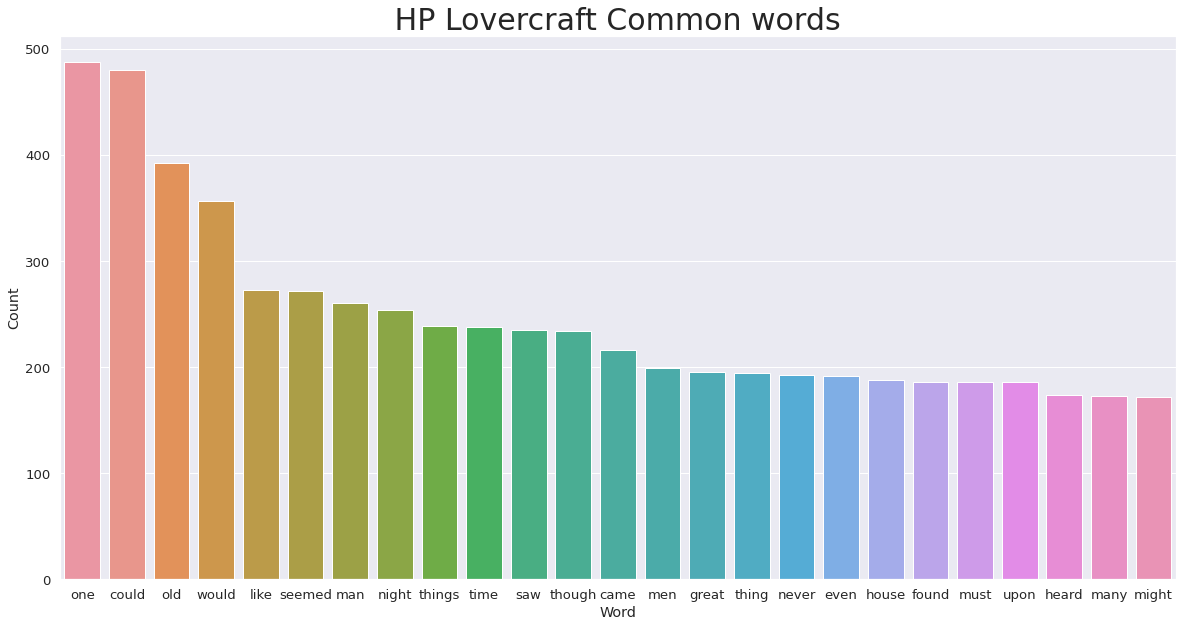

In [ ]:
# Visualize most 25 common words 
plt.title(" HP Lovercraft Common words ", size=30 )
df = pd.DataFrame(first_25, columns = ['Word', 'Count'])
sns.barplot(x = 'Word', y = 'Count', data = df)
plt.show()

In [ ]:
word_cloud = WordCloud(collocations = False, background_color = 'white',
                       height = 3000,width=3000).generate(sentences_HPL)

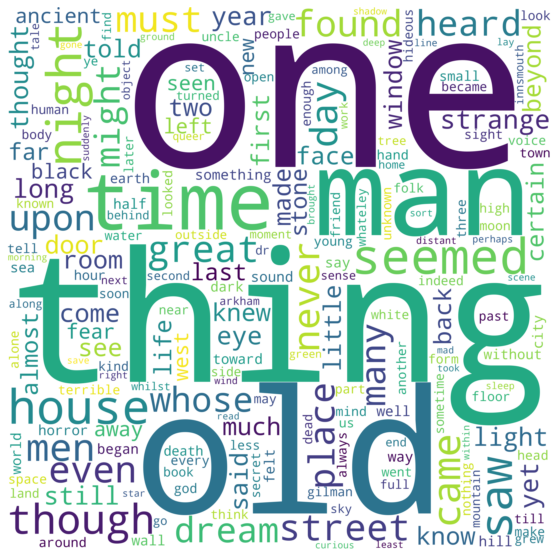

In [ ]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### **3.   Mary Wollstonecraft Shelley**

In [ ]:
#Selecting Mary Wollstonecraft Shelley sentence from dataframe
sentences_MWS = train['text'][train['author']=='MWS']
sentences_MWS

3        lovely spring looked windsor terrace sixteen f...
5        youth passed solitude best years spent gentle ...
9        confess neither structure languages code gover...
10       shall find feel injuries shall learn dread rev...
15       escaped must commence destructive almost endle...
                               ...                        
19563              yet rude hand rent away dear connection
19566    reflections made legislators pause could decid...
19569           fancy soothed dreams virtue fame enjoyment
19570    nay may met another may love considering bound...
19573    stress weather drove us adriatic gulph vessel ...
Name: text, Length: 6044, dtype: object

In [ ]:
# Adding all Mary Wollstonecraft Shelley Texts in one Text    
sentences_MWS = " ".join( str(sentence) for sentence in sentences_MWS)
sentences_MWS

'lovely spring looked windsor terrace sixteen fertile counties spread beneath speckled happy cottages wealthier towns looked former years heart cheering fair youth passed solitude best years spent gentle feminine fosterage refined groundwork character cannot overcome intense distaste usual brutality exercised board ship never believed necessary heard mariner equally noted kindliness heart respect obedience paid crew felt peculiarly fortunate able secure services confess neither structure languages code governments politics various states possessed attractions shall find feel injuries shall learn dread revenge days arrived escaped must commence destructive almost endless journey across mountainous ices ocean amidst cold inhabitants could long endure native genial sunny climate could hope survive native sprightliness needed undue excitement placid heart reposed contented love well children beauty surrounding nature rich young guardian appointed would act one great society must keep secre

In [ ]:
list_words_MWS = sentences_MWS.split(' ')

In [ ]:
list_words_MWS

['lovely',
 'spring',
 'looked',
 'windsor',
 'terrace',
 'sixteen',
 'fertile',
 'counties',
 'spread',
 'beneath',
 'speckled',
 'happy',
 'cottages',
 'wealthier',
 'towns',
 'looked',
 'former',
 'years',
 'heart',
 'cheering',
 'fair',
 'youth',
 'passed',
 'solitude',
 'best',
 'years',
 'spent',
 'gentle',
 'feminine',
 'fosterage',
 'refined',
 'groundwork',
 'character',
 'cannot',
 'overcome',
 'intense',
 'distaste',
 'usual',
 'brutality',
 'exercised',
 'board',
 'ship',
 'never',
 'believed',
 'necessary',
 'heard',
 'mariner',
 'equally',
 'noted',
 'kindliness',
 'heart',
 'respect',
 'obedience',
 'paid',
 'crew',
 'felt',
 'peculiarly',
 'fortunate',
 'able',
 'secure',
 'services',
 'confess',
 'neither',
 'structure',
 'languages',
 'code',
 'governments',
 'politics',
 'various',
 'states',
 'possessed',
 'attractions',
 'shall',
 'find',
 'feel',
 'injuries',
 'shall',
 'learn',
 'dread',
 'revenge',
 'days',
 'arrived',
 'escaped',
 'must',
 'commence',
 'destruc

In [ ]:
dict_words_MWS_count = {}
for word in list_words_MWS : 
   if word not in dict_words_MWS_count:
        dict_words_MWS_count[word] = 1
   else:
        dict_words_MWS_count[word] += 1

In [ ]:
# Dictionary for each words and its count
dict_words_MWS_count

{'lovely': 60,
 'spring': 28,
 'looked': 75,
 'windsor': 73,
 'terrace': 4,
 'sixteen': 9,
 'fertile': 14,
 'counties': 3,
 'spread': 26,
 'beneath': 36,
 'speckled': 3,
 'happy': 85,
 'cottages': 10,
 'wealthier': 1,
 'towns': 18,
 'former': 36,
 'years': 126,
 'heart': 262,
 'cheering': 3,
 'fair': 32,
 'youth': 47,
 'passed': 119,
 'solitude': 43,
 'best': 44,
 'spent': 44,
 'gentle': 73,
 'feminine': 4,
 'fosterage': 1,
 'refined': 8,
 'groundwork': 1,
 'character': 15,
 'cannot': 66,
 'overcome': 23,
 'intense': 23,
 'distaste': 6,
 'usual': 28,
 'brutality': 3,
 'exercised': 5,
 'board': 10,
 'ship': 12,
 'never': 175,
 'believed': 17,
 'necessary': 36,
 'heard': 103,
 'mariner': 4,
 'equally': 5,
 'noted': 2,
 'kindliness': 1,
 'respect': 15,
 'obedience': 8,
 'paid': 8,
 'crew': 6,
 'felt': 136,
 'peculiarly': 6,
 'fortunate': 4,
 'able': 14,
 'secure': 23,
 'services': 9,
 'confess': 10,
 'neither': 32,
 'structure': 3,
 'languages': 6,
 'code': 1,
 'governments': 3,
 'politic

In [ ]:
  # Dictionary for each words and its count Descending 
dict(sorted(dict_words_MWS_count.items(),reverse=True, key=lambda item: item[1]))

{'would': 475,
 'one': 474,
 'could': 383,
 'life': 328,
 'yet': 318,
 'love': 273,
 'us': 272,
 'might': 269,
 'heart': 262,
 'raymond': 248,
 'even': 248,
 'eyes': 243,
 'every': 233,
 'time': 231,
 'man': 228,
 'must': 212,
 'first': 211,
 'said': 208,
 'day': 202,
 'upon': 200,
 'death': 192,
 'may': 185,
 'shall': 180,
 'ever': 178,
 'never': 175,
 'father': 173,
 'like': 167,
 'made': 166,
 'still': 165,
 'night': 162,
 'mind': 162,
 'many': 157,
 'perdita': 156,
 'saw': 150,
 'towards': 147,
 'found': 143,
 'hope': 142,
 'words': 140,
 'thought': 140,
 'whose': 139,
 'felt': 136,
 'long': 136,
 'thus': 136,
 'see': 133,
 'nature': 132,
 'friend': 132,
 'last': 132,
 'earth': 128,
 'became': 127,
 'years': 126,
 'adrian': 126,
 'seemed': 122,
 'among': 122,
 'voice': 121,
 'little': 120,
 'passed': 119,
 'world': 119,
 'soon': 118,
 'fear': 117,
 'came': 117,
 'soul': 115,
 'spirit': 115,
 'human': 113,
 'come': 111,
 'tears': 110,
 'part': 109,
 'idris': 109,
 'let': 109,
 'coun

In [ ]:
# most 25 common words 
dict_items = dict(sorted(dict_words_MWS_count.items(),reverse=True, key=lambda item: item[1])).items()
first_25 = list(dict_items)[:25]
print(first_25)

[('would', 475), ('one', 474), ('could', 383), ('life', 328), ('yet', 318), ('love', 273), ('us', 272), ('might', 269), ('heart', 262), ('raymond', 248), ('even', 248), ('eyes', 243), ('every', 233), ('time', 231), ('man', 228), ('must', 212), ('first', 211), ('said', 208), ('day', 202), ('upon', 200), ('death', 192), ('may', 185), ('shall', 180), ('ever', 178), ('never', 175)]


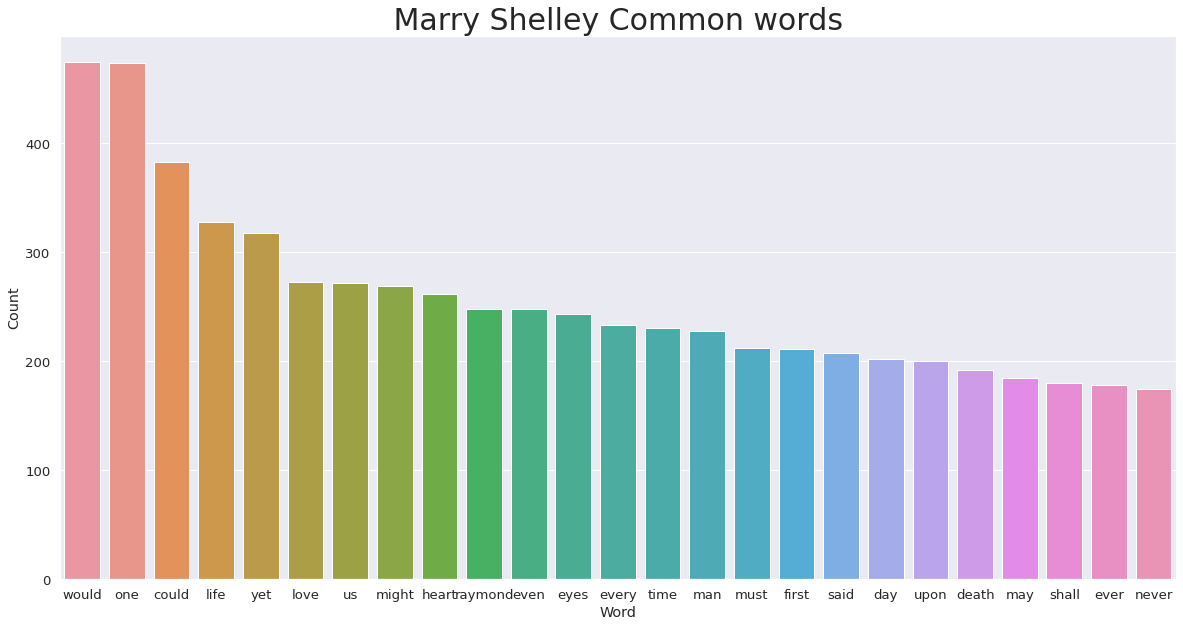

In [ ]:
# Visualize most 25 common words 
plt.title(" Marry Shelley Common words ", size=30 )
df = pd.DataFrame(first_25, columns = ['Word', 'Count'])
sns.barplot(x = 'Word', y = 'Count', data = df)
plt.show()

In [ ]:
word_cloud = WordCloud(collocations = False, background_color = 'white',
                       height = 3000,width=3000).generate(sentences_MWS)

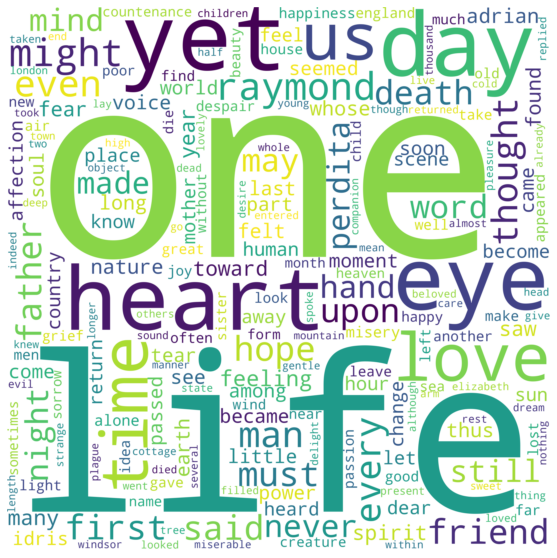

In [ ]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off") 
plt.show()

## Final Quick Overview

In [ ]:
import pandas_profiling
pandas_profiling.ProfileReport(train)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Preprocessing 

## Applying TF-IDF 

In [ ]:
x = train['text']
y = train['author']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_transformer =TfidfVectorizer(stop_words='english')
tfidf_transformer.fit(x)

TfidfVectorizer(stop_words='english')

In [ ]:
x = tfidf_transformer.transform(x)

## Spliting

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    shuffle=True,
                                                    random_state=44)

In [ ]:
x_train.shape

(15663, 25067)

In [ ]:
x_test.shape

(3916, 25067)

In [ ]:
y_train.shape

(15663,)

In [ ]:
y_test.shape

(3916,)

# Modelling and Evalution for Train Data

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:
models = {
    "LR": LogisticRegression(max_iter = 1000, C =1.5),
    "Naive Bayes " : MultinomialNB(alpha=0.09),
    "RF": RandomForestClassifier(n_estimators=150),
    "DT": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "GradientBoosting"  :  GradientBoostingClassifier(),
    "XGB": XGBClassifier(n_estimators=100)
}

In [ ]:
for name, model in models.items():
    print(f'Training Model {name} \n-----------------------------------------------')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Training Accuracy: {model.score(x_train, y_train)}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print('-'*70)

Training Model LR 
-----------------------------------------------
Training Accuracy: 0.9521802975164401
Testing Accuracy: 0.8036261491317671
Testing Confusion Matrix: 
[[1361   99  102]
 [ 216  850   64]
 [ 219   69  936]]
----------------------------------------------------------------------
Training Model Naive Bayes  
-----------------------------------------------
Training Accuracy: 0.951286471301794
Testing Accuracy: 0.832482124616956
Testing Confusion Matrix: 
[[1308   99  155]
 [ 145  917   68]
 [ 147   42 1035]]
----------------------------------------------------------------------
Training Model RF 
-----------------------------------------------
Training Accuracy: 0.9990423290557364
Testing Accuracy: 0.7070990806945863
Testing Confusion Matrix: 
[[1269  142  151]
 [ 328  691  111]
 [ 305  110  809]]
----------------------------------------------------------------------
Training Model DT 
-----------------------------------------------
Training Accuracy: 0.9990423290557364
Te

In [ ]:
model = MultinomialNB(alpha=0.09)
model.fit(x_train, y_train)

MultinomialNB(alpha=0.09)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
print('Frist 10 Real Outputs in Testing : \n ', y_test[:10].values)
print('--'*50)
print('Frist 10 Predicated Outputs in Testing : \n ', y_pred[:10])

Frist 10 Real Outputs in Testing : 
  ['HPL' 'EAP' 'MWS' 'EAP' 'MWS' 'EAP' 'MWS' 'MWS' 'EAP' 'EAP']
----------------------------------------------------------------------------------------------------
Frist 10 Predicated Outputs in Testing : 
  ['HPL' 'EAP' 'MWS' 'EAP' 'MWS' 'EAP' 'HPL' 'MWS' 'EAP' 'EAP']


In [ ]:
y_compare={'y_test':y_test, 'y_predicted':y_pred}
pd.DataFrame(y_compare)

y_test y_predicted
551      HPL         HPL
16978    EAP         EAP
14530    MWS         MWS
11706    EAP         EAP
12293    MWS         MWS
...      ...         ...
10340    MWS         MWS
12050    EAP         EAP
19061    MWS         MWS
3568     EAP         EAP
15875    EAP         EAP

[3916 rows x 2 columns]

In [ ]:
print('Training Score is : ' , model.score(x_train, y_train))
print( '--'*50)
print('Testing Score is : ' , model.score(x_test, y_test))

Training Score is :  0.951286471301794
----------------------------------------------------------------------------------------------------
Testing Score is :  0.832482124616956


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [ ]:
print('confusion Matrix :')  
print('--'*30)
print(confusion_matrix(y_test,y_pred))

confusion Matrix :
------------------------------------------------------------
[[1308   99  155]
 [ 145  917   68]
 [ 147   42 1035]]


In [ ]:
df_cm = pd.DataFrame(confusion_matrix(y_test,y_pred), columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual Labels'
df_cm.columns.name = 'Predicted Labels'
df_cm

Predicted Labels   EAP  HPL   MWS
Actual Labels                    
EAP               1308   99   155
HPL                145  917    68
MWS                147   42  1035

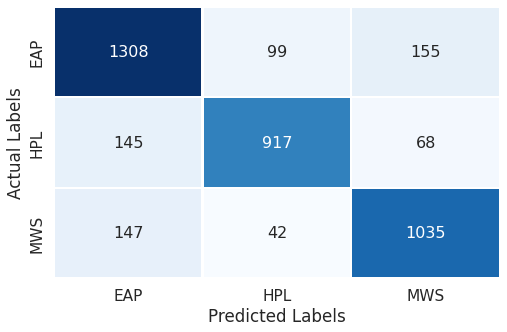

In [ ]:
plt.figure(figsize = (8,5))
sns.set(font_scale=1.4)
sns.heatmap( df_cm,cmap='Blues', annot=True,annot_kws={"size": 16},fmt='',
            linewidths=1.3,cbar=False , linecolor = 'w')

In [ ]:
matrix = classification_report(y_test,y_pred)
print('Classification report :')
print('--'*30)
print(matrix)


Classification report :
------------------------------------------------------------
              precision    recall  f1-score   support

         EAP       0.82      0.84      0.83      1562
         HPL       0.87      0.81      0.84      1130
         MWS       0.82      0.85      0.83      1224

    accuracy                           0.83      3916
   macro avg       0.84      0.83      0.83      3916
weighted avg       0.83      0.83      0.83      3916



# Predicting Test Data

In [ ]:
test

text
0     still urged leaving ireland inquietude impatie...
1     fire wanted fanning could readily fanned newsp...
2     broken frail door found two cleanly picked hum...
3     thinking possibly manage without one actually ...
4                       sure limit knowledge may extend
...                                                 ...
8387                                     fitter purpose
8388                                fixed wide solitude
8389  easily understood might improve closely scruti...
8390  may began feel inspiration burning hope length...
8391  long winded statistical drearily genealogical ...

[8392 rows x 1 columns]

In [ ]:
x_test_2 = test['text'] 
x_test_2

0       still urged leaving ireland inquietude impatie...
1       fire wanted fanning could readily fanned newsp...
2       broken frail door found two cleanly picked hum...
3       thinking possibly manage without one actually ...
4                         sure limit knowledge may extend
                              ...                        
8387                                       fitter purpose
8388                                  fixed wide solitude
8389    easily understood might improve closely scruti...
8390    may began feel inspiration burning hope length...
8391    long winded statistical drearily genealogical ...
Name: text, Length: 8392, dtype: object

In [ ]:
x_test_2 = tfidf_transformer.transform(x_test_2)
x_test_2.shape

(8392, 25067)

In [ ]:
y_pred_2 = model.predict(x_test_2)

In [ ]:
y_pred_2[:10]

array(['MWS', 'EAP', 'HPL', 'HPL', 'EAP', 'EAP', 'EAP', 'MWS', 'EAP',
       'EAP'], dtype='<U3')